# Experiment Type 1

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & \ge 1; \\
s & \ge 0; \\
Z & = N(0, \sigma^2)
\end{align}
$$

This is a simple class of experiments that linear regression should be
very good at. $F$ is a linear function of $X$, there are one or more
features, zero or more confounding features, and normally distributed
noise.

In [1]:
import impactstudy.experiment as ise
from impactchart.model import XGBoostImpactModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Configuration

In [2]:
N = 100

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [3]:
experiment0 = ise.LinearWithNoiseExperiment(m=2, s=2, sigma=10.0)

### Generate Impact Charts

In [4]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


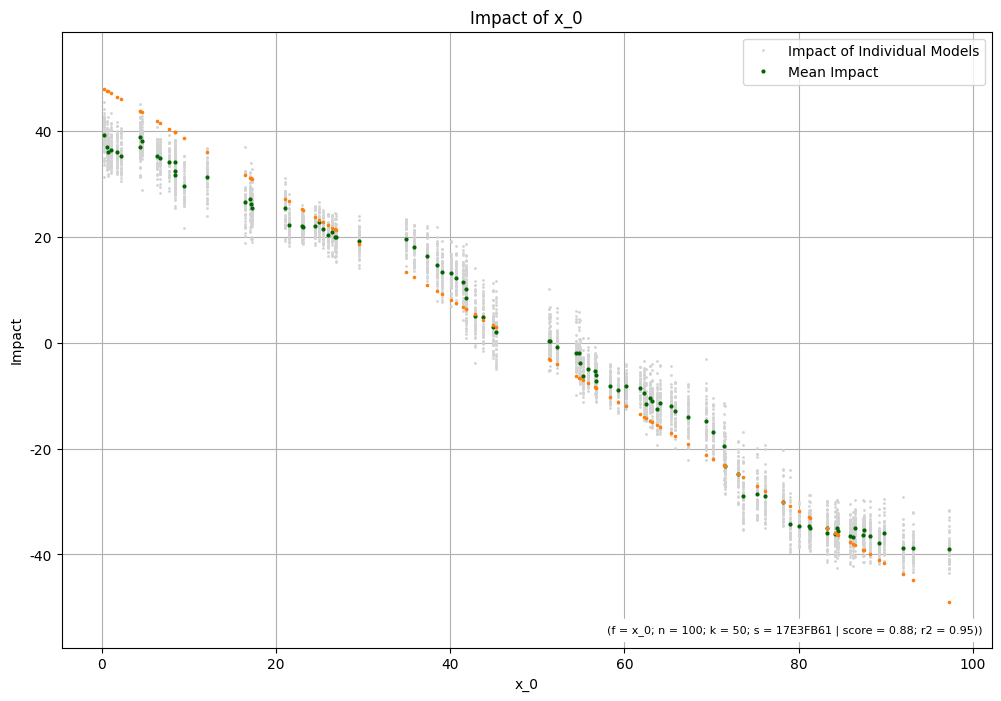

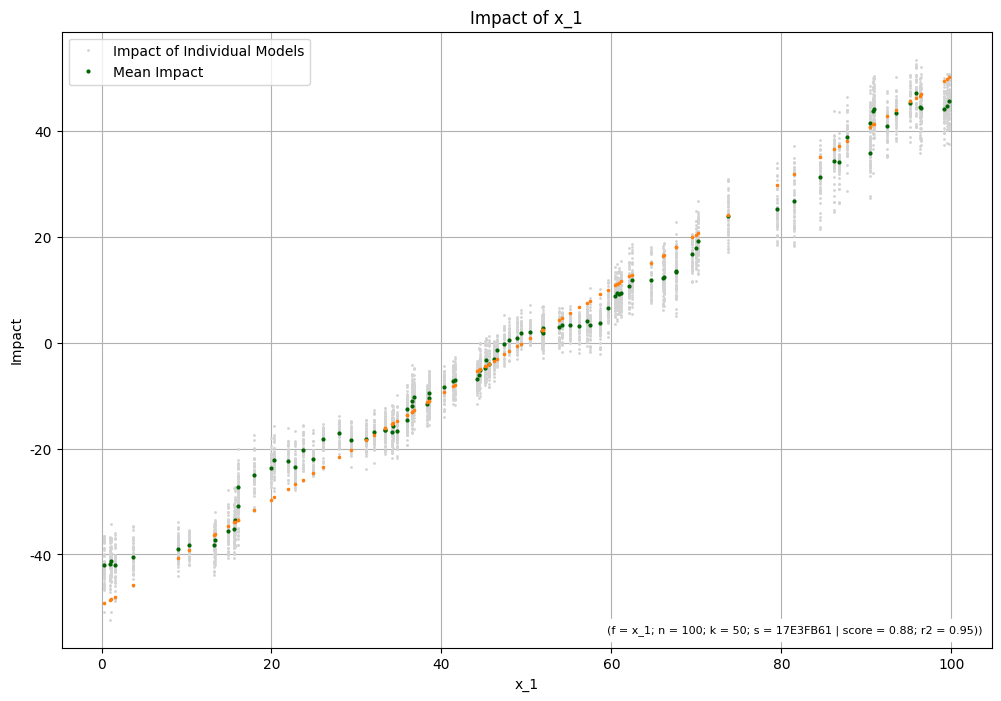

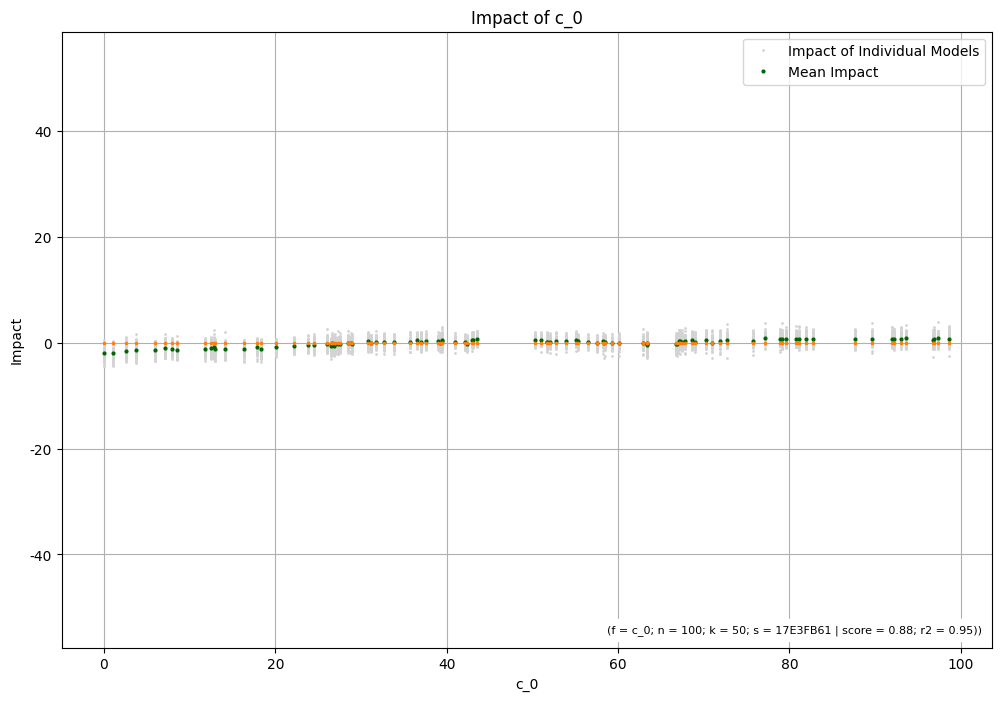

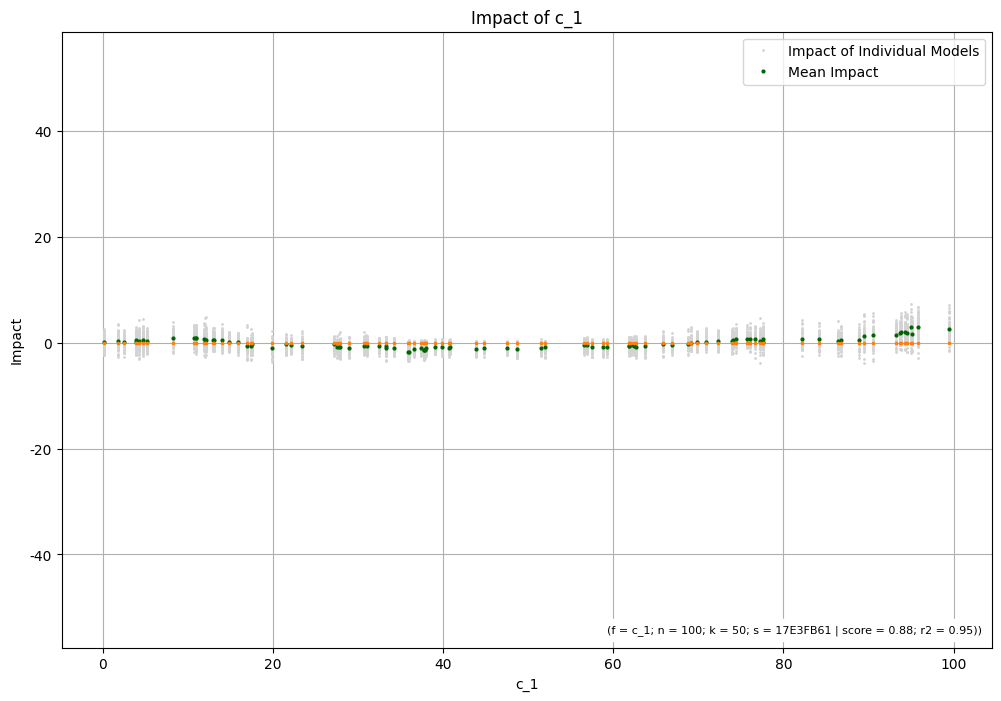

In [5]:
impact_charts = scenario.model_impact_charts(N)

### Generate Metrics

In [6]:
scenario.model_errors(N)

,metric,x_0,x_1,c_0,c_1
0,RMSE,4.725407,3.182576,0.667633,0.994763
0,MAE,3.884125,2.503360,0.520719,0.814960
0,MED_AE,3.593177,1.969700,0.425854,0.691308


## A Multi-Scenario Experiment

In [7]:
experiment = ise.LinearWithNoiseExperiment(m=range(4,5), s=0, sigma=np.arange(0.0, 51.0, 10.0))

In [8]:
df_model_errors = experiment.model_errors(N)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [9]:
df_model_errors

,metric,x_0,x_1,x_2,x_3,m,s,sigma
0,RMSE,3.504770,2.015850,2.964356,3.588694,4,0,0.0
0,MAE,2.590110,1.582274,2.466548,2.804000,4,0,0.0
0,MED_AE,2.137465,1.309339,2.004168,2.146126,4,0,0.0
0,RMSE,4.380812,2.317687,3.826427,5.074595,4,0,10.0
0,MAE,3.723959,1.812408,3.175629,3.747525,4,0,10.0
0,MED_AE,3.306463,1.513877,2.797919,2.743595,4,0,10.0
0,RMSE,5.757443,2.296510,4.860893,5.931567,4,0,20.0
0,MAE,5.124396,1.628231,3.998241,4.157979,4,0,20.0
0,MED_AE,5.279313,1.032189,3.280122,2.710902,4,0,20.0
0,RMSE,8.591025,3.750863,6.062985,8.399991,4,0,30.0


m  metric
4  MAE       Axes(0.125,0.11;0.775x0.77)
   MED_AE    Axes(0.125,0.11;0.775x0.77)
   RMSE      Axes(0.125,0.11;0.775x0.77)
dtype: object

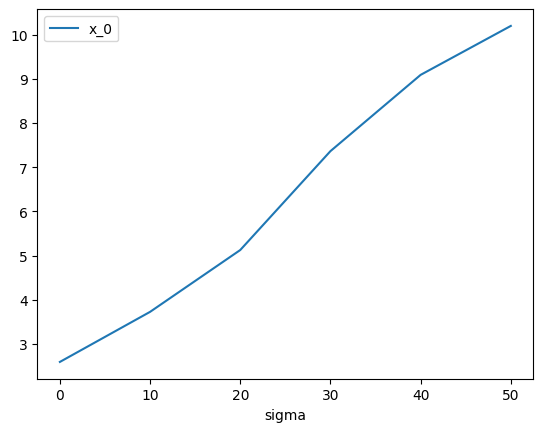

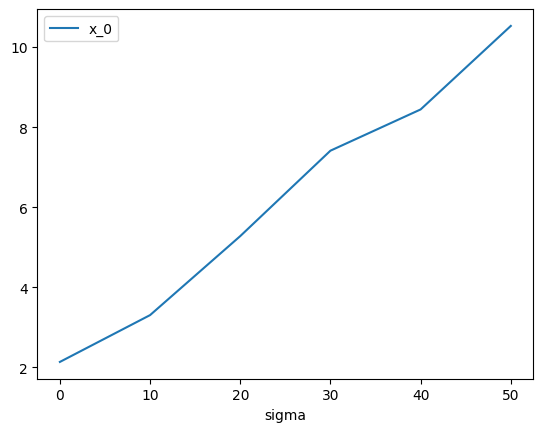

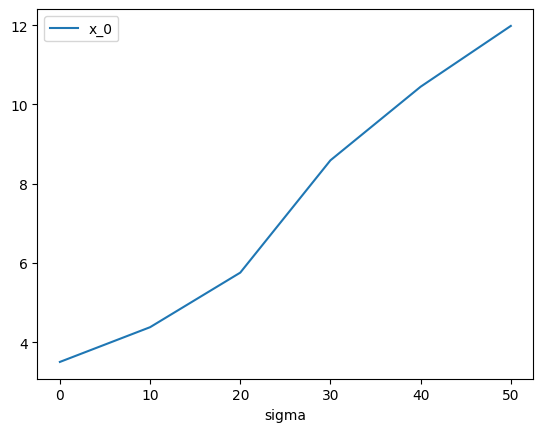

In [10]:
df_model_errors.groupby(['m', 'metric']).plot(
    'sigma', 'x_0'
)